In [64]:
from loaders.full_loader import FullLoader
from tqdm import tqdm
from analysis.doc_compression import DocumentCompression
from util.util import convert_language_name_to_code, better_names, better_lang, generate_csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
loader = FullLoader("/Users/michaelryan/Downloads/Corpora/corpora.pkl")

In [15]:
def get_doc_compression_all_corpora(doc_corpora):
    c_ratios = {}
    c_pdfs = {}
    c_names = {}

    for i, corpora in enumerate(tqdm(doc_corpora)):
        ratios = []
        pdfs = []
        names = []
        for corpus in corpora.corpora:
            doc_comp = DocumentCompression(corpus)
            ratios.append(doc_comp.ratios)
            pdfs.append(doc_comp.pdf)
            names.append(corpus.name)
        c_ratios[corpora.name] = ratios
        c_pdfs[corpora.name] = pdfs
        c_names[corpora.name] = names
    
    return c_ratios, c_pdfs, c_names        

In [16]:
corpora = loader.get_all_doc_aligned_grouped_paper_order()

In [17]:
c_ratios, c_pdfs, c_names = get_doc_compression_all_corpora(corpora)

100%|██████████| 13/13 [09:43<00:00, 44.87s/it]  


In [42]:
c_names = {'Newsela EN': ['EN 0-1',
  'EN 1-2',
  'EN 2-3',
  'EN 3-4'],
 'WikiAutoEN': ['WikiAuto'],
 'Simplext': ['Simplext'],
 'Newsela ES': ['ES 0-1',
  'ES 1-2',
  'ES 2-3',
  'ES 3-4'],
 'TerenceTeacher': ['Terence', 'Teacher'],
 'Alector': ['Alector'],
 'PorSimples': ['Natural', 'Strong'],
 'Simple German': ['SimpleDE'],
 'TextComplexityDE': ['TextCompDE'],
 'German News': ['A2', 'B2'],
 'CBST': ['Struct', 'Int'],
 'RuAdapt': ['Fairy',
  'Enc B-C',
  'Enc A-C',
  'Enc A-B',
  'Lit'],
 'Klexikon': ['Klexikon']}

In [54]:
def add_document_compression_to_existing_plot(ax, ratios, pdfs, names, plt_title=''):
    assert len(ratios) == len(pdfs)
    assert len(ratios) == len(names)

    colors = ['#000000', '#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    colors = colors[:len(ratios)]

    max_pdf = 0
    min_pdf = 100

    for ratio, pdf, name, color in zip(ratios, pdfs, names, colors):
        assert len(ratio[:,0]) == len(pdf)

        font = {'family' : 'monospace',
                'weight' : 'normal',
                'size'   : 8}
        plt.rc('font', **font) 

        ax.plot(
            ratio[:, 0],
            pdf,
            color=color,
            lw=1,
            linestyle="-",
            label=better_names(name) + ' (' + str(len(ratio)) + ' docs)',
        )
        max_pdf = max(max_pdf, max(pdf))
        min_pdf = min(min_pdf, min(pdf))
    
    endpoint_x = 2.0
    ymax = max_pdf + 0.05
    ymin = min_pdf - 0.05

    for ratio, pdf, color in zip(ratios, pdfs, colors):
        mean = np.mean(ratio[:,0])
        idx_mean = (np.abs(ratio[:,0] - mean)).argmin()
        ax.plot([mean, mean], [ymin, pdf[idx_mean]], color=color, linestyle='--', lw=1, label="_")

    ax.legend(loc="upper right")
    
    ax.set_title(plt_title)
    # ax.set_xlabel('Compression Ratio', font=font)
    # ax.set_ylabel('Density', font=font)

    ax.set_xlim(0, endpoint_x)
    ax.set_ylim(ymin, ymax)

    ax.set_yticks([])
    ax.set_yticklabels([])

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

In [33]:
def name_to_lang(name):
    map = {'Newsela EN': "English",
            'WikiAutoEN': "English",
            'Simplext': "Spanish",
            'Newsela ES': "Spanish",
            'TerenceTeacher': "Italian",
            'Alector': "French",
            'PorSimples': "Brazilian Portuguese",
            'Simple German': "German",
            'TextComplexityDE': "German",
            'German News': "German",
            'CBST': "Basque",
            'RuAdapt': "Russian",
            'Klexikon': "German"}

    return map[name]

In [61]:
order = ['Newsela EN',
            'WikiAutoEN',
            'Simple German',
            'Newsela ES',
            'Simplext',
            'TextComplexityDE',
            'TerenceTeacher',
            'Alector',
            'German News',
            'CBST',
            'PorSimples',
            'Klexikon',
            'RuAdapt']

In [19]:
figure_dims = (5,3)

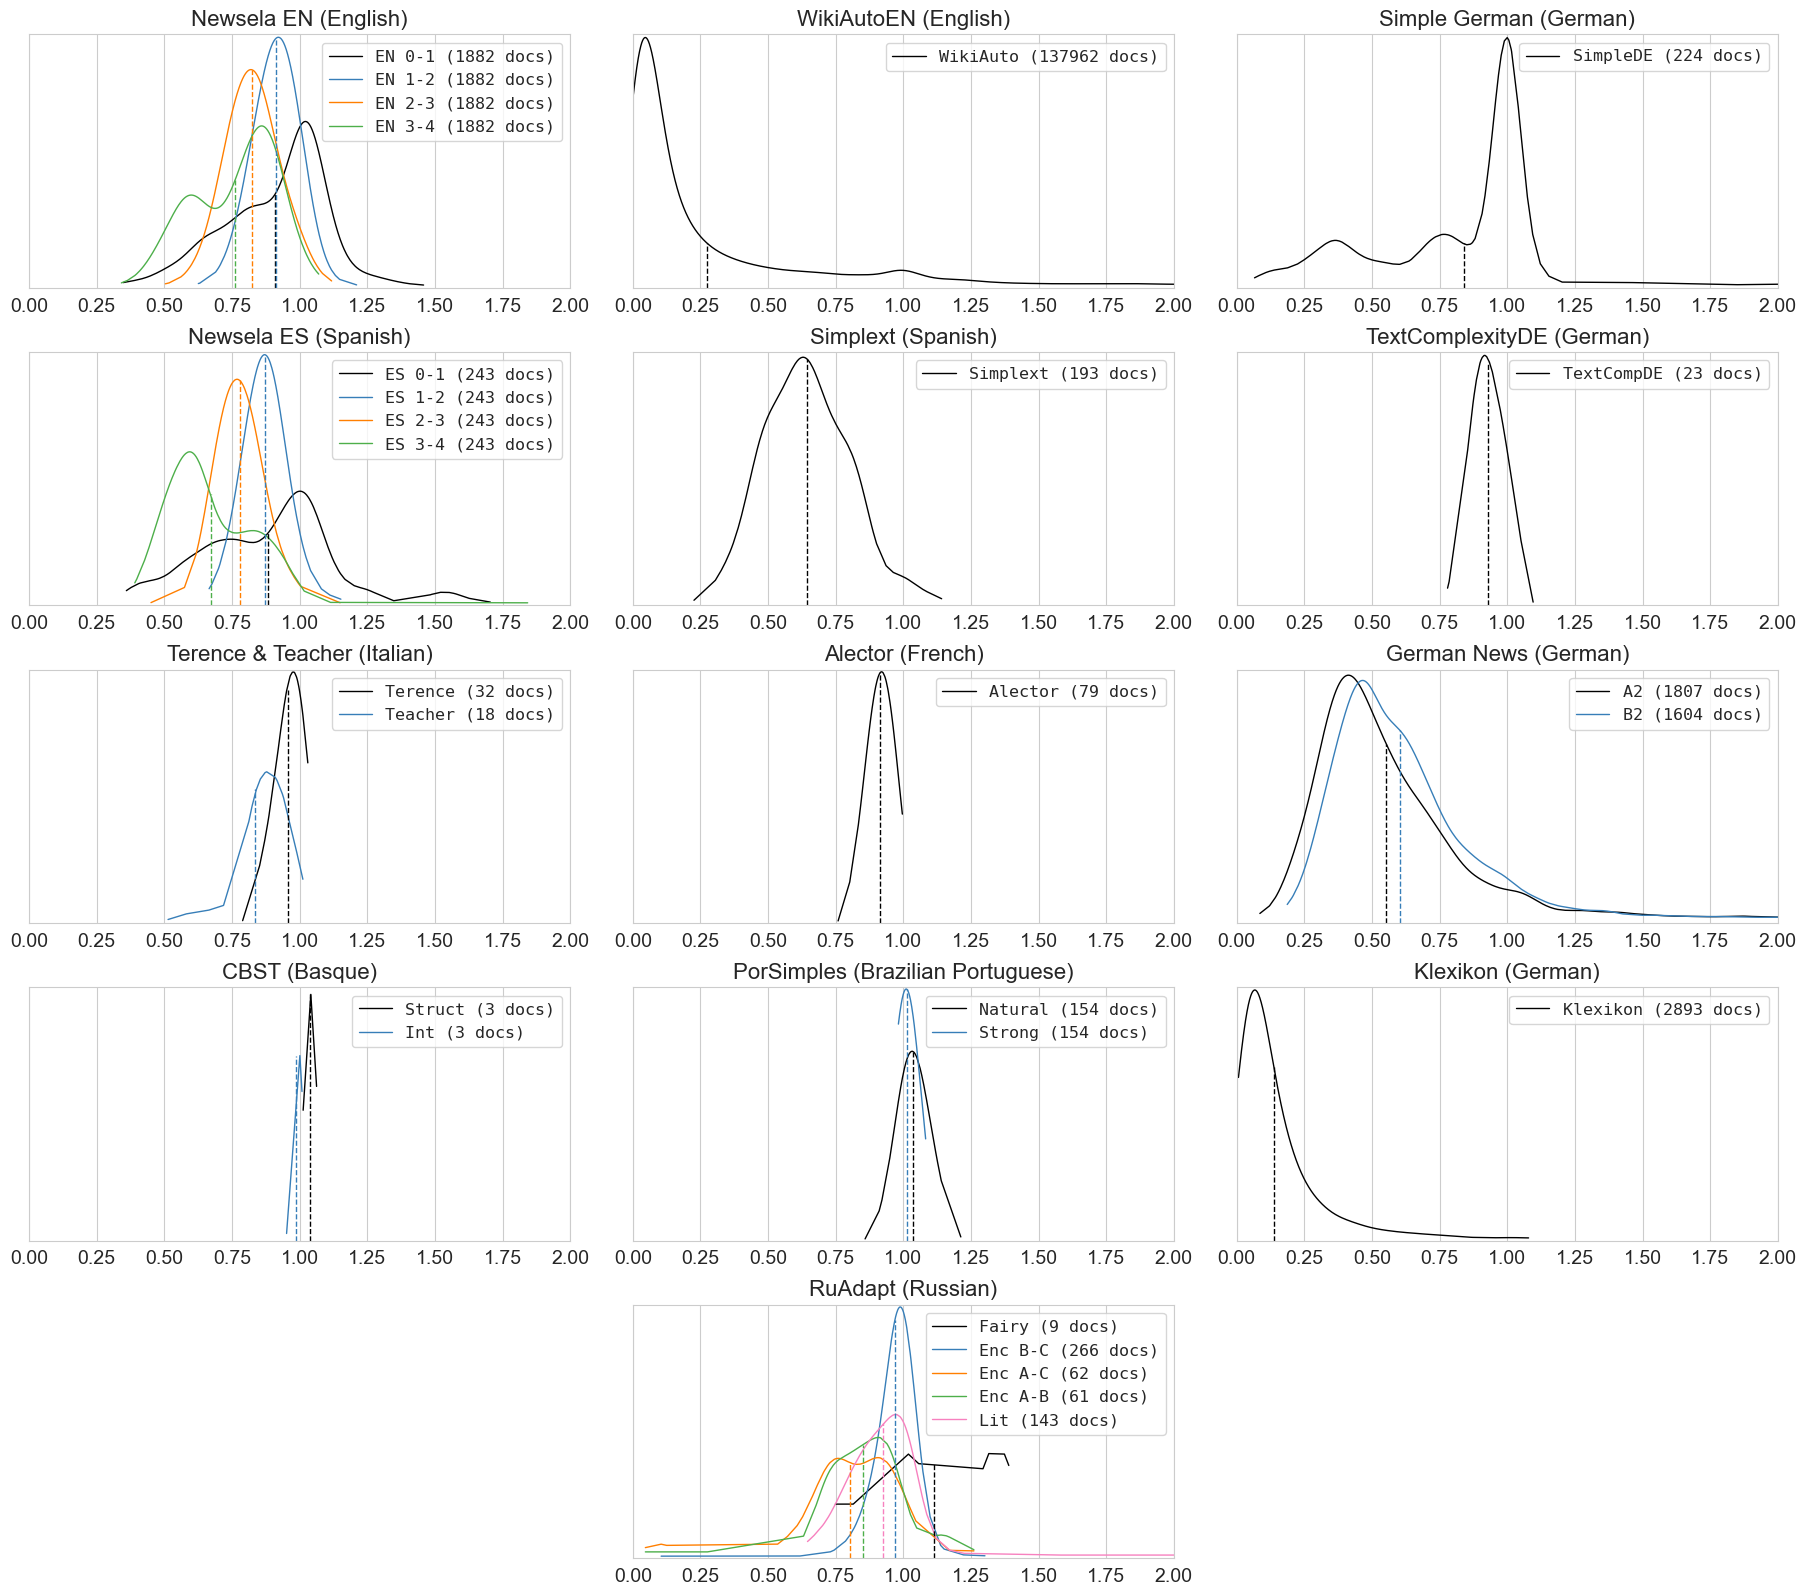

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

fig, ax = plt.subplots(nrows=figure_dims[0], ncols=figure_dims[1])

for i, corpus in enumerate(order):
    if (corpus == "TerenceTeacher"):
        add_document_compression_to_existing_plot(ax[i//figure_dims[1], i%figure_dims[1]], c_ratios[corpus], c_pdfs[corpus], c_names[corpus], 'Terence & Teacher (' + name_to_lang(corpus) + ')')
    else:
        add_document_compression_to_existing_plot(ax[i//figure_dims[1], i%figure_dims[1]], c_ratios[corpus], c_pdfs[corpus], c_names[corpus], better_names(corpus) + ' (' + name_to_lang(corpus) + ')')

    plt.gcf().set_size_inches(18, 16)

add_document_compression_to_existing_plot(ax[4,1], c_ratios['RuAdapt'], c_pdfs['RuAdapt'], c_names['RuAdapt'], "RuAdapt (Russian)")

fig.tight_layout()
fig.delaxes(ax[4][0])
fig.delaxes(ax[4][2])

plt.savefig("./output/doc_compression.pdf", bbox_inches='tight', pad_inches=0)  